In [2]:
import yt
print(yt.__version__) # 3.6.0 or higher
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment

3.6.0


## Plot a single image

In [12]:
datfile = '~/uni/astro/archive/output_P4/turbulence_0100.dat'
ds = yt.load(datfile)
ad = ds.all_data()

yt : [INFO     ] 2020-11-27 16:10:22,768 Parameters: current_time              = 75.0
yt : [INFO     ] 2020-11-27 16:10:22,769 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-27 16:10:22,770 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-27 16:10:22,771 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-27 16:10:22,772 Parameters: cosmological_simulation   = 0


yt : [WARNING  ] 2020-11-27 16:10:24,268 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-27 16:10:24,804 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-27 16:10:24,805 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-27 16:10:24,806 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-27 16:10:24,806 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-27 16:10:24,807 Making a fixed resolution buffer of (('amrvac', 'm1')) 800 by 800
yt : [WARNING  ] 2020-11-27 16:10:25,322 Plot image for field ('amrvac', 'm1') has both positive and negative values. Min = -0.910466, Max = 5.143116.
yt : [WARNING  ] 2020-11-27 16:10:25,323 Switching to symlog colorbar scaling unless linear scaling is specified later



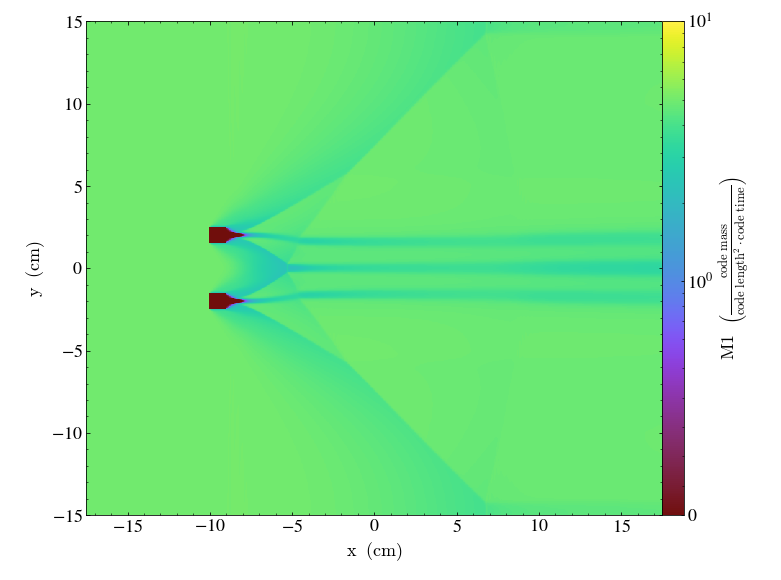

In [13]:
p = yt.plot_2d(ds, 'm1')
p.set_zlim('m1', 0, 10)
p.show()

## Plot the average velocity

### Axis 0

In [3]:
ts = yt.load("~/uni/astro/archive/output_P4/*.dat")

data = 'm1'
BEGIN = 200
NUM = 10

total = None
for ds in ts[BEGIN:BEGIN+NUM]:
    all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)

    profile = np.squeeze(all_data_level_0[data])[-10,:]
    if total is None:
        total = profile
    else:
        total += profile
        
total /= len(ts[BEGIN:BEGIN+NUM])

plt.plot(total)
plt.show()



yt : [INFO     ] 2020-11-27 16:20:17,862 Parameters: current_time              = 150.0
yt : [INFO     ] 2020-11-27 16:20:17,863 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-27 16:20:17,863 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-27 16:20:17,863 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-27 16:20:17,864 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-27 16:20:18,222 e not found and no parfile passed, can not set thermal_pressure.


RuntimeError: Error: yt attempted to read outside the boundaries of a non-periodic domain along dimension 0.
Region left edge = -18.0 code_length, Region right edge = 17.0 code_length
Dataset left edge = 0.0 code_length, Dataset right edge = 35.0 code_length

This commonly happens when trying to compute ghost cells up to the domain boundary. Two possible solutions are to load a smaller region that does not border the edge or override the periodicity for this dataset.

### Axis 1

yt : [INFO     ] 2020-11-27 14:31:56,196 Parameters: current_time              = 150.0
yt : [INFO     ] 2020-11-27 14:31:56,197 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-27 14:31:56,198 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-27 14:31:56,199 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-27 14:31:56,200 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-27 14:31:56,584 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-27 14:31:57,433 Parameters: current_time              = 150.75
yt : [INFO     ] 2020-11-27 14:31:57,434 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-27 14:31:57,435 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-27 14:31:57,435 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-27 14:31:57,436 Parameters: cosmological_simula

yt : [INFO     ] 2020-11-27 14:32:14,181 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-27 14:32:14,621 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-27 14:32:15,503 Parameters: current_time              = 161.25
yt : [INFO     ] 2020-11-27 14:32:15,503 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-27 14:32:15,504 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-27 14:32:15,505 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-27 14:32:15,506 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-27 14:32:15,908 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-27 14:32:16,675 Parameters: current_time              = 162.0
yt : [INFO     ] 2020-11-27 14:32:16,676 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-27 14:32:16,676 Parameters: domain_left_edge 

yt : [INFO     ] 2020-11-27 14:32:33,463 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-27 14:32:33,463 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-27 14:32:33,878 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-27 14:32:34,784 Parameters: current_time              = 172.5
yt : [INFO     ] 2020-11-27 14:32:34,785 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-27 14:32:34,785 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-27 14:32:34,786 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-27 14:32:34,786 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-27 14:32:35,220 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-27 14:32:36,007 Parameters: current_time              = 173.25
yt : [INFO     ] 2020-11-27 14:32:36,008 Parameters: domain_dimensions

yt : [INFO     ] 2020-11-27 14:32:52,673 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-27 14:32:52,674 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-27 14:32:52,674 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-27 14:32:53,070 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-27 14:32:54,041 Parameters: current_time              = 183.75
yt : [INFO     ] 2020-11-27 14:32:54,041 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-27 14:32:54,042 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-27 14:32:54,043 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-27 14:32:54,044 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-27 14:32:54,630 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-27 14:32:55,457 Parameters: current_time

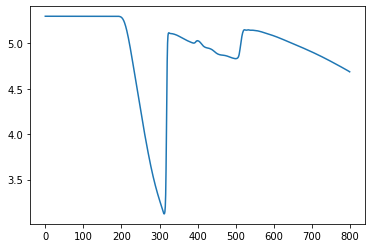

In [3]:
ts = yt.load("~/uni/astro/archive/output_K/*.dat")

data = 'm1'
NUM = 50

total = None
for ds in ts[200:200+NUM]:
    all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0],dims=ds.domain_dimensions)

    squeezed = np.squeeze(all_data_level_0[data])
    profile = squeezed[:,squeezed.shape[1]//2]
    if total is None:
        total = profile
    else:
        total += profile
        
total /= len(ts[200:200+NUM])

plt.plot(total)
plt.show()


## Plot slices along the various axes

average along y axis:
[4.9999999  4.99999972 4.99999861 4.99999663 4.99999066 4.99997786
 4.9999511  4.99988937 4.99981375 4.99876648 5.00782772 4.54893486
 4.63146665 4.625013   4.62942371 4.63125602 4.63671022 4.64144375
 4.64386419 4.64498925 4.64732264 4.64609792 4.6519061  4.65523965
 4.66113878 4.66797409 4.67666682 4.68813766 4.69719333 4.7025966
 4.70379259 4.6974747  4.69620591 4.69992876 4.70091649 4.69634895
 4.6932725  4.69358039 4.69464939 4.69565505 4.6972992  4.69531135
 4.69336559 4.69430936 4.69628969 4.69745299 4.69732645 4.69717533
 4.69645226 4.69656408] code_mass/(code_length**2*code_time)


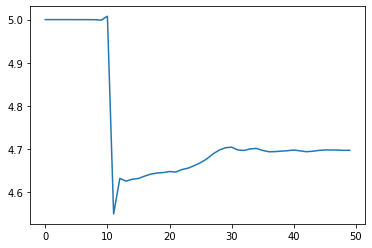

---
skewness along y axis:
[-7.26989875e-19 -1.73542041e-17 -1.44517465e-16 -3.42064265e-16
  2.82084051e-15  6.92970318e-14  9.22334651e-13  1.17041525e-11
  1.02903793e-10 -8.95059431e-08  2.30618655e-05 -7.46101415e+00
 -1.59095939e+00 -7.88359569e-01 -3.81559034e-01 -2.48402256e-01
 -1.86992209e-01 -1.59805969e-01 -1.45153753e-01 -1.30129032e-01
 -1.18658457e-01 -1.03893092e-01 -9.33645807e-02 -8.41061386e-02
 -7.70516749e-02 -7.18680832e-02 -6.90477047e-02 -6.86072015e-02
 -6.82484485e-02 -6.69617815e-02 -6.51518860e-02 -6.23689086e-02
 -5.99933235e-02 -5.81433651e-02 -5.65143250e-02 -5.38453870e-02
 -5.03492474e-02 -4.76305827e-02 -4.54793724e-02 -4.34984805e-02
 -4.17742725e-02 -3.95125258e-02 -3.73084383e-02 -3.56723390e-02
 -3.43908248e-02 -3.30847000e-02 -3.21012626e-02 -3.09504657e-02
 -3.00140116e-02 -2.89306320e-02]


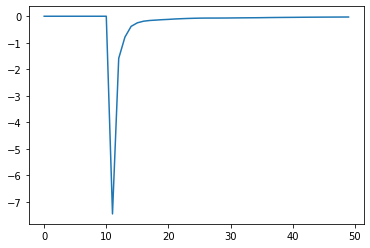

---



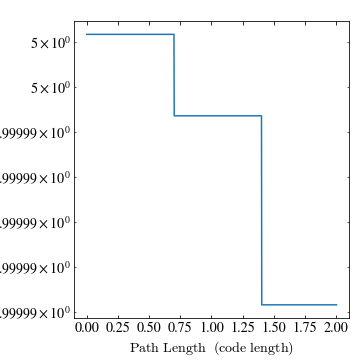

In [8]:
all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0],dims=ds.domain_dimensions)

print('average along y axis:')

print(np.average(np.squeeze(all_data_level_0['m1']), axis=1))
plt.plot(np.average(np.squeeze(all_data_level_0['m1']), axis=1))
plt.show()
print('---')


print('skewness along y axis:')
print(moment(np.squeeze(all_data_level_0['m1']), axis=1, moment=3))
plt.plot(moment(np.squeeze(all_data_level_0['m1']), axis=1, moment=3))
plt.show()
print('---')


p = yt.LinePlot(ds, ['m1'], (0, 0.5, 0), (2, 0.5, 0), 1000)
p.show()

In [ ]:
p = yt.SlicePlot(ds, 'y', 'm1')
p.show()

yt : [INFO     ] 2020-11-25 15:50:13,077 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-25 15:50:13,078 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-25 15:50:13,078 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-25 15:50:13,079 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-25 15:50:13,079 Making a fixed resolution buffer of (('amrvac', 'm1')) 800 by 800



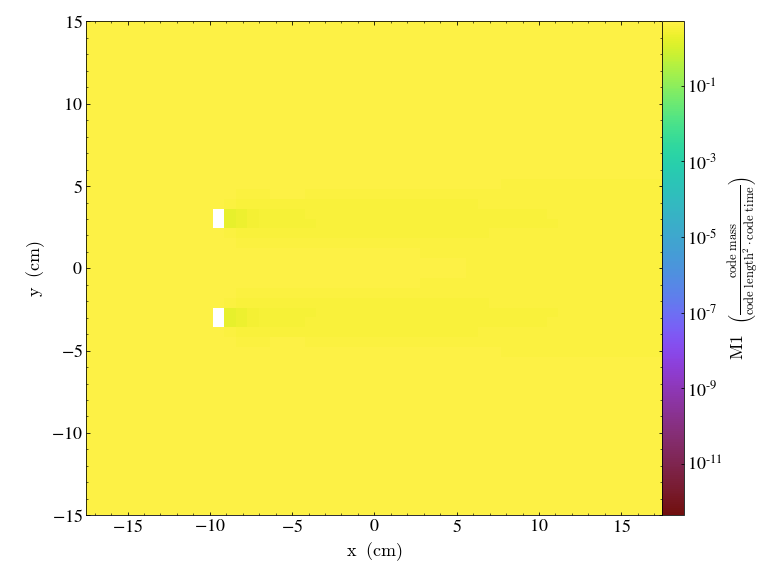

In [11]:
p = yt.SlicePlot(ds, 'z', 'm1')
p.show()